In [1]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import math
from astropy import table
from astropy.table import Table, join, unique
from astropy.io import ascii
import astropy.io.fits as pyfits
from astropy.wcs import WCS
import os


In [2]:
# import SNeCO data
SNe_Gal_File = '../Data/3.SNe+GalData.csv'
SNe_Gal_Data = Table.read(SNe_Gal_File, format='csv') 

SNe_Gal_Data[0]

galaxy,SN_name,SN_type,SN_ra,SN_dec,SN_xCoord,SN_yCoord,SN_co21int,SN_co21err,SN_co21ew,map_beamsize,orient_ra,orient_dec,dist,orient_posang,orient_incl,size_r25,telOrient,ImageFile150,ErrFile150,AlphaCOFile,PACovFile,IFRFile,MixedMaps,IFRResizedMaps,MassMaps
str8,str11,str12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str9,str112,str113,str80,str112,str97,str37,str54,str35
circinus,SN1996cr,II,213.2918,-65.3457,86.56761411031889,84.63433198287285,186.84804,2.137819,34.56537,0.002032163908078,213.29124,-65.33915,4.2,36.74,64.3,262.49515,7m+tp,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_broad_mom0.fits,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_broad_emom0.fits,/data/kant/0/sun.1608/PHANGS/ALMA/alphaCO/v1p0/ESO097-013_alphaCO21_scaling.fits,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_coverage2d.fits,/data/tycho/0/leroy.42/projects/phangs_survey_2019/working_data/z0mgs/eso097-013_w1_gauss7p5.fits,../Data/MixedMaps/circinus_Mixed.fits,../Data/ReprojectedInfraredMaps/circinus_reshaped.fits,../Data/MassMaps/circinus_Mass.fits


In [3]:
# File location: /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc7793/ngc7793_7m+tp_co21_150pc_broad_mom0.fits

In [4]:
# isolate unique galaxies and their telescope orientation
galData = unique(SNe_Gal_Data,"galaxy")
gals, telOrient = galData["galaxy"], galData["telOrient"]

# for i in range(len(gals)):
#     print(gals[i], telOrient[i])

In [5]:
pc60FileList, pc90FileList, pc60errFile, pc90errFile = [],[],[],[]

def fileStr(galaxy, telOrient, res, mapType="img"):
    if galaxy ==  "ngc0628":
        telOrient = "12m+7m"
    if galaxy == "ngc3627":
        telOrient = "2_12m+7m"
    if galaxy == "ngc5236":
        telOrient = "12m+7m"
    if galaxy =="ngc6744":
        telOrient = "12m+7m+tp"        
        
    if mapType == "img":
        return("/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/" + galaxy + "/" + galaxy + "_" + telOrient + "_co21_" + str(res) + "pc_broad_mom0.fits")
    else:
        return("/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/" + galaxy + "/" + galaxy + "_" + telOrient + "_co21_" + str(res) + "pc_broad_emom0.fits")

for i in range(len(gals)):
    pc60FileList.append(fileStr(gals[i], telOrient[i], 60))
    pc60errFile.append(fileStr(gals[i], telOrient[i], 60, mapType="err"))


In [6]:
# group each galaxy's SNe data

gal_groups = SNe_Gal_Data.group_by('galaxy')
galaxies = gal_groups.groups.keys
indices = gal_groups.groups.indices
indices = indices.tolist()
indices.append(0)
#print(gals)
print(indices)
# print(gal_groups["SN_name"][4])

images60, err60, name, types, ras, decs = [],[],[],[],[],[]
for i in range(len(indices)-2):
    SNnames, SNtypes, SNras, SNdecs = [],[],[],[]
    images60.append(pc60FileList[i])
    err60.append(pc60errFile[i])
    if gal_groups["SN_name"][indices[i]] != "SN1989B" and gal_groups["SN_name"][indices[i]] != "SN1973R":
    # Attach first SN per galaxy to a list
        SNnames.append(gal_groups["SN_name"][indices[i]])
        SNtypes.append(gal_groups["SN_type"][indices[i]])
        SNras.append(gal_groups["SN_ra"][indices[i]])
        SNdecs.append(gal_groups["SN_dec"][indices[i]])
    j = 1
    # attach additional  SN to list when galaxy has more than one
    while(indices[i] + j < indices[i+1]):    
        if gal_groups["SN_name"][indices[i]+j] != "SN1989B" and gal_groups["SN_name"][indices[i]+j] != "SN1973R":
            SNnames.append(gal_groups["SN_name"][indices[i]+j])
            SNtypes.append(gal_groups["SN_type"][indices[i]+j])
            SNras.append(gal_groups["SN_ra"][indices[i]+j])
            SNdecs.append(gal_groups["SN_dec"][indices[i]+j])
        j += 1
    name.append(SNnames)
    types.append(SNtypes)
    ras.append(SNras)
    decs.append(SNdecs)    
print(name)

[0, 1, 2, 3, 4, 5, 7, 10, 11, 12, 16, 18, 19, 20, 21, 23, 24, 28, 32, 39, 45, 46, 47, 49, 50, 52, 53, 55, 60, 61, 62, 63, 0]
[['SN1996cr'], ['SN1940E'], ['SN2013ej'], ['SN2018ivc'], ['SN1995V'], ['SN1999eu', 'SN1992bd'], ['SN2001du', 'SN1983V', 'SN2012fr'], ['SN1985P'], ['SN1935C'], ['SN1984J', 'SN1986L', 'SN2005df', 'SN2009ib'], ['ASASSN-14ha', 'SN2010el'], ['SN1999em'], ['SN2017gax'], ['SN1993Z'], ['SN2008eh', 'SN2003jg'], ['SN2012A'], ['SN2016cok', 'SN2009hd'], ['SN1967H', 'SN1972Q', 'SN1986I', 'SN2014L'], ['SN1961I', 'SN1926A', 'SN1999gn', 'SN2006ov', 'SN2020jfo', 'SN1964F', 'SN2014dt'], ['SN1959E', 'SN2006X', 'SN2020oi', 'SN2019ehk', 'SN1901B', 'SN1979C'], ['SN2012cg'], ['SN2020nvb'], ['SN1988M', 'SN1960F'], ['SN1981B'], ['SN1989M', 'SN1988A'], ['SN2011ja'], ['SN1986G', 'SN2016adj'], ['SN1983N', 'SN1968L', 'SN1923A', 'SN1950B', 'SN1957D'], ['SN2007it'], ['SN2005at'], ['SN2008bk']]


In [7]:
def getPlotStuff(gal, image, error, names, types, ras, decs):
    plots, sigma, wcss, hdus, beamsizes, plotAspect, ppb, corner, SNnames, SNtypes, SNras, SNdecs, SNgals, cdelts = [],[],[],[],[],[],[],[],[],[],[],[],[],[]

    for i in range(len(gal)):

        if os.path.isfile(image[i]):
            img = image[i]
            err=error[i]

            co_hdu = pyfits.open(img)
            hdus.append(co_hdu)

            beamMaj = co_hdu[0].header['BMAJ']
            beamMin = co_hdu[0].header['BMIN']
            if(beamMaj==beamMin):
                beamsizes.append(beamMaj)
            else:
                beamsizes.append(0.0)

            co_map = co_hdu[0].data
            plots.append(co_map)
            err_hdu = pyfits.open(err)
            err_map = err_hdu[0].data
            sig_map = co_map / err_map
            sigma.append(sig_map)
            w = WCS(co_hdu[0].header, naxis=2)
            wcss.append(w)
            x = co_map.shape[0]
            y = co_map.shape[1]
            naxis    = w._naxis # size of image naxis[0] = x and [1] = y
            grid     = np.indices((naxis[1],naxis[0]))
            aspect = float(y)/float(x)
            cdelt = co_hdu[0].header['CDELT1']
            cdelts.append(cdelt)
            ppb.append(beamMaj/np.abs(cdelt))
            plotAspect.append(aspect)
            corner.append(x/15.0)
            
            SNnames.append(name[i])
            SNtypes.append(types[i])
            SNras.append(ras[i]) 
            SNdecs.append(decs[i])
            SNgals.append(gal[i])
            
        else:
#             print("No 60 pc file for:",image[i])
            pass

    return(plots, sigma, wcss, hdus, beamsizes, plotAspect, ppb, corner, SNnames, SNtypes, SNras, SNdecs, SNgals, cdelts)

In [8]:
# set up 60pc plots, wcs information, and make sigma maps for contours.

plots60, sigma60, wcss60, hdus60, beamsizes60, plotAspect60, ppb60, corner60, SNnames, SNtypes, SNras, SNdecs, SNgals, cdelts = getPlotStuff(gals, images60, err60, name, types, ras, decs)

print(SNnames)

[['SN2013ej'], ['SN2016cok', 'SN2009hd'], ['SN1983N', 'SN1968L', 'SN1923A', 'SN1950B', 'SN1957D'], ['SN2005at']]


In [9]:
legendLabels = []

for i in range(len(SNnames)):
    legendlabel = []
    if len(SNnames[i]) > 1:
        for k in range(len(SNnames[i])):
            if SNtypes[i][k] == 'unclassified':
                label = SNnames[i][k] + ' '  + SNtypes[i][k]
            else:
                label = SNnames[i][k] + ' Type '  + SNtypes[i][k]
            legendlabel.append(label)
    else:
        if SNtypes[i][0] == 'unclassified':
            legendlabel.append(SNnames[i][0] + ' '  + SNtypes[i][0]) 
        else:        
            legendlabel.append(SNnames[i][0] + ' Type '  + SNtypes[i][0])
    legendLabels.append(legendlabel)
print(legendLabels)

print(beamsizes60)


[['SN2013ej Type II'], ['SN2016cok Type II', 'SN2009hd Type II'], ['SN1983N Type Ib', 'SN1968L Type II', 'SN1923A Type II', 'SN1950B unclassified', 'SN1957D unclassified'], ['SN2005at Type Ic']]
[0.000349364509226111, 0.0002830785685173, 0.000703015699547022, 0.000366107217335989]


<ipython-input-10-1535b40f053e>:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  current_cmap.set_bad("black")
<ipython-input-10-1535b40f053e>:19: RuntimeWarning: divide by zero encountered in log10
  logplot = np.log10(plot)
<ipython-input-10-1535b40f053e>:19: RuntimeWarning: invalid value encountered in log10
  logplot = np.log10(plot)


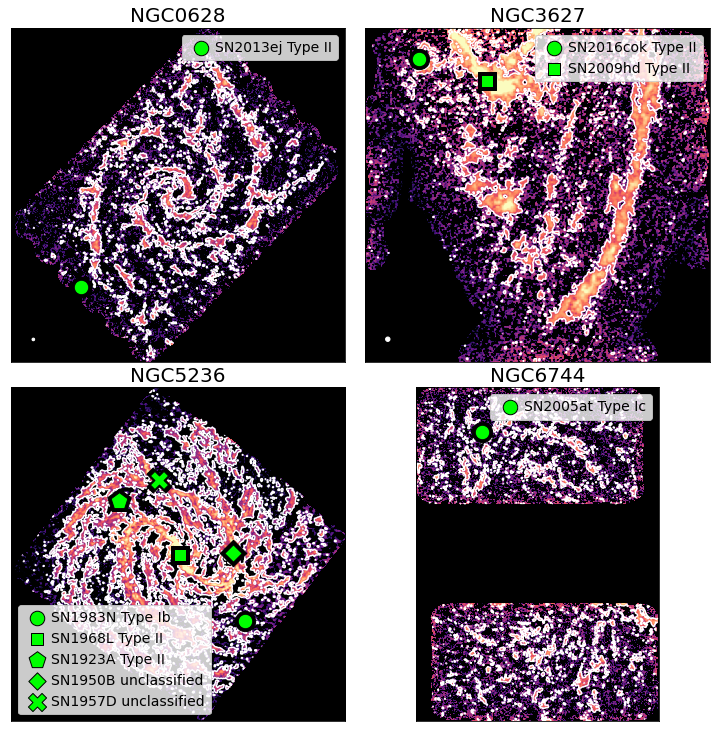

In [10]:
from matplotlib.patches import Circle


markerShapes = ["o", "s", "p", "D", "X", "H", "v"]
markerSizes  = [210,150,310,150,330,310,350]
markerEdges  = [410,350,610,350,630,610,650]

current_cmap = plt.get_cmap("magma")
current_cmap.set_bad("black")

import math
i,j,m=0,0,0
PLOTS_PER_ROW = 2
fig, axs = plt.subplots(math.ceil(len(plots60)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(10, 10))
for plot in plots60:
    draw_circle = plt.Circle((corner60[m], corner60[m]),ppb60[m], fill = True, color = 'white')

    xArr, yArr = wcss60[m].wcs_world2pix(SNras[m],SNdecs[m],0)
    logplot = np.log10(plot)
    axs[i][j].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin = -0.5, vmax = 2.0, zorder = 0)
    axs[i][j].set_title(SNgals[m].upper(), fontsize=20)
    axs[i][j].set_xticks([])
    axs[i][j].set_yticks([])
    axs[i][j].add_patch(draw_circle)
    for n in range(len(SNdecs[m])):
        axs[i][j].scatter(xArr[n], yArr[n], color = "black", marker = markerShapes[n], s = markerEdges[n], zorder=2)
        axs[i][j].scatter(xArr[n], yArr[n], color = "lime", marker = markerShapes[n], s = markerSizes[n], edgecolor="black", label = legendLabels[m][n], zorder = 2)
    axs[i][j].contour(sigma60[m], [3], colors = ["white"], linestyles = ("-"), zorder = 1)
    axs[i][j].legend(loc="best", fontsize=14, handletextpad=0.007)

    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
    m +=1
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()
fig.savefig("../Figures/AllSNeInGalaxies_60pc.png", dpi=300)
   
print()

In [21]:
print(plots60[3][2:10][2:10])
print(plots60[3][2:10])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [11]:
print(SNras)
print(SNgals)
print(SNnames)

[[24.2007], [170.0797, 170.0707], [204.2135, 204.252, 204.2883, 204.2203, 204.2647], [287.4733]]
['ngc0628', 'ngc3627', 'ngc5236', 'ngc6744']
[['SN2013ej'], ['SN2016cok', 'SN2009hd'], ['SN1983N', 'SN1968L', 'SN1923A', 'SN1950B', 'SN1957D'], ['SN2005at']]


332.88275158091994 356.5798802757223
405 260 281 431
228.49829813441235 1000.8518579072179
250 206 950 1050


<ipython-input-74-4786b12ad636>:51: RuntimeWarning: divide by zero encountered in log10
  logplot = np.log10(plot)
<ipython-input-74-4786b12ad636>:51: RuntimeWarning: invalid value encountered in log10
  logplot = np.log10(plot)
<ipython-input-74-4786b12ad636>:22: RuntimeWarning: divide by zero encountered in log10
  logplot = np.log10(plot)
<ipython-input-74-4786b12ad636>:22: RuntimeWarning: invalid value encountered in log10
  logplot = np.log10(plot)


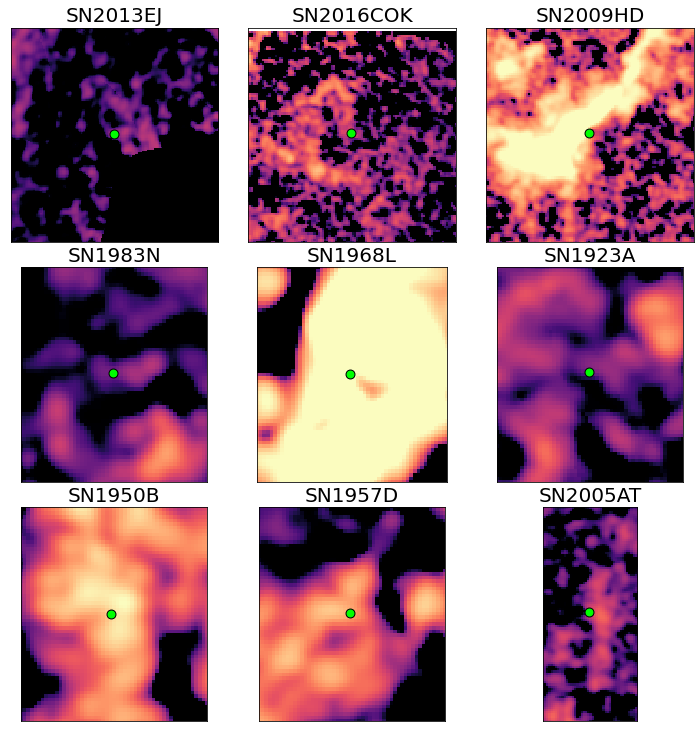

In [74]:

halfBox = 0.00416667 # 15' in degrees
numSNe = 9
m,n,p =0,0,0 # plot counters for total number, rows, columns
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(numSNe/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(10, 10))

#for i in range(0,numSNe): # counter to count total plots
for j in range(len(SNgals)): # counter to count galaxy maps
    if  len(SNras[j]) > 1:
        for k in range(len(SNras[j])): # counter to count number of SN in each galaxy

            SNraStart  = SNras[j][k]  -  halfBox
            SNraEnd    = SNras[j][k]  +  halfBox
            SNdecStart = SNdecs[j][k] -  halfBox
            SNdecEnd   = SNdecs[j][k] +  halfBox

            xVal, yVal     = wcss60[j].wcs_world2pix(SNras[j][k],SNdecs[j][k],0)
            xStart, yStart = wcss60[j].wcs_world2pix(SNraStart, SNdecStart,0)
            xEnd, yEnd     = wcss60[j].wcs_world2pix(SNraEnd, SNdecEnd,0)
            xStart, xEnd, yStart, yEnd = int(xStart), int(xEnd), int(yStart), int(yEnd)
            plot = plots60[j]#[xStart:xEnd][yStart:yEnd]
            logplot = np.log10(plot)

            axs[m][n].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin = -0.5, vmax = 2.0, zorder = 0)
            axs[m][n].set_ylim(yStart,yEnd)
            axs[m][n].set_xlim(xStart,xEnd)
            axs[m][n].set_title(SNnames[j][k].upper(), fontsize=20)
            axs[m][n].set_xticks([])
            axs[m][n].set_yticks([])
            axs[m][n].scatter(xVal, yVal, color = "black", marker = "o", s = 60, zorder=2)
            axs[m][n].scatter(xVal, yVal, color = "lime", marker = "o", s = 80, edgecolor="black",zorder = 2)
            
            n+=1
            if n%PLOTS_PER_ROW==0:
                m+=1
                n=0
            p +=1
    else:
        SNraStart  = SNras[j][0]  -  halfBox
        SNraEnd    = SNras[j][0]  +  halfBox
        SNdecStart = SNdecs[j][0] -  halfBox
        SNdecEnd   = SNdecs[j][0] +  halfBox

        xVal, yVal     = wcss60[j].wcs_world2pix(SNras[j][0],SNdecs[j][0],0)
        (print(xVal,yVal))
        xStart, yStart = wcss60[j].wcs_world2pix(SNraStart, SNdecStart,0)
        xEnd, yEnd     = wcss60[j].wcs_world2pix(SNraEnd, SNdecEnd,0)
        xStart, xEnd, yStart, yEnd = int(xStart), int(xEnd), int(yStart), int(yEnd)
        print(xStart, xEnd, yStart, yEnd)
        plot = plots60[j]#[xStart:xEnd][yStart:yEnd]
        logplot = np.log10(plot)

        axs[m][n].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin = -0.5, vmax = 2.0, zorder = 0)
        axs[m][n].set_ylim(yStart,yEnd)
        axs[m][n].set_xlim(xStart,xEnd)

        axs[m][n].set_title(SNnames[j][0].upper(), fontsize=20)
        axs[m][n].set_xticks([])
        axs[m][n].set_yticks([])
        axs[m][n].scatter(xVal, yVal, color = "black", marker ="o", s = 60, zorder=2)
        axs[m][n].scatter(xVal, yVal, color = "lime", marker = "o", s = 80, edgecolor="black",zorder = 2)

        n+=1
        if n%PLOTS_PER_ROW==0:
            m+=1
            n=0
        p +=1

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()
fig.savefig("../Figures/Zooms_60pc.png", dpi=300)


In [65]:
# isolate each SN. 
# find pixel width in galaxy map and convert to  15", with ra/dec of SN at center
# plot each of these
# print(cdelts)
# print(SNras)
# print(SNdecs)





In [ ]:
# SNgals, SNnames, SNtypes, SNras, SNdecs